# **Importing Packages and Performing Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
bankrupt=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/bankruptcy%20prevention.csv")
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
print("Shape:",bankrupt.shape)
print("Size:",bankrupt.size)

Shape: (250, 7)
Size: 1750


In [ ]:
bankrupt.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [ ]:
# Duplicates
for col in bankrupt.columns:
  duplicate_count = bankrupt[col].duplicated().sum()
  print(f"Number of duplicate values in '{col}': {duplicate_count}")

Number of duplicate values in 'industrial_risk': 247
Number of duplicate values in 'management_risk': 247
Number of duplicate values in 'financial_flexibility': 247
Number of duplicate values in 'credibility': 247
Number of duplicate values in 'competitiveness': 247
Number of duplicate values in 'operating_risk': 247
Number of duplicate values in 'class': 248


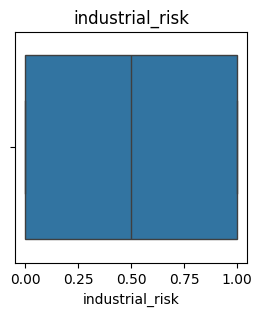

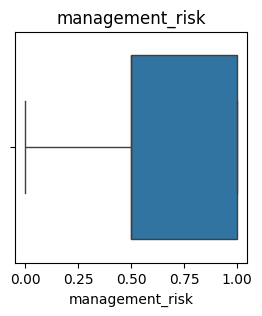

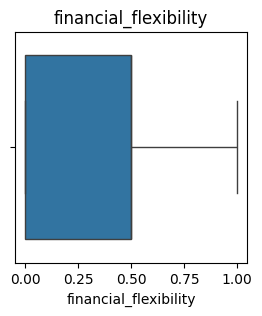

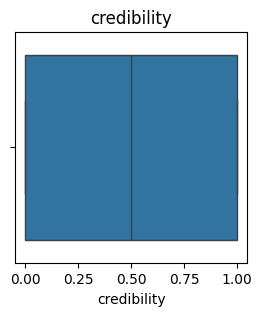

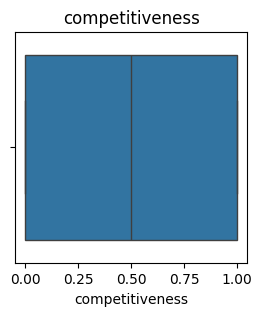

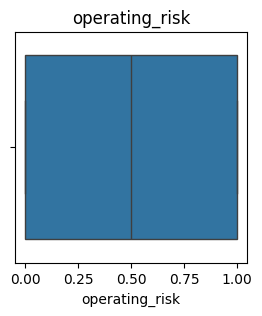

In [ ]:
# Outliers
# Get list of numeric columns
numeric_cols = bankrupt.select_dtypes(include=['int64', 'float64']).columns

# Iterate through numeric columns and plot small boxplots
for col in numeric_cols:
  plt.figure(figsize=(3, 3))
  sns.boxplot(x=col, data=bankrupt)
  plt.title(col)
  plt.show()

In [ ]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Industrial Risk occurence probability
industrial_risk_count = bankrupt[bankrupt['industrial_risk'] == 1].shape[0]
total_count = bankrupt.shape[0]
industrial_risk_percentage = (industrial_risk_count / total_count) * 100
print("Chances of industrial risk occurrence:", industrial_risk_percentage, "%")

Chances of industrial risk occurrence: 35.6 %


In [ ]:
# Level threshold for Operation Risk
mean = bankrupt['operating_risk'].mean()
std = bankrupt['operating_risk'].std()

threshold = mean + (2 * std)
print("To avoid Operation Risk, maintain level below", threshold, "threshold")

To avoid Operation Risk, maintain level below 1.4391499794321967 threshold


In [ ]:
# Correlation between Management Risk and Operating Risk
correlation = bankrupt['management_risk'].corr(bankrupt['operating_risk'])
print(f"Correlation between management risk and operating risk: {correlation}")

Correlation between management risk and operating risk: 0.21387395658229438


In [ ]:
# Top 3 features more likely for Bankruptcy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = bankrupt.drop('class', axis=1)
y = bankrupt['class']

selector = SelectKBest(chi2, k=3)
X_top_3 = selector.fit_transform(X, y)
top_3_features = [X.columns[i] for i in selector.get_support(indices=True)]

print("Top 3 features most likely to lead to Bankruptcy:")
for feature in top_3_features:
    print(f"\t- {feature}")

Top 3 features most likely to lead to Bankruptcy:
	- financial_flexibility
	- credibility
	- competitiveness


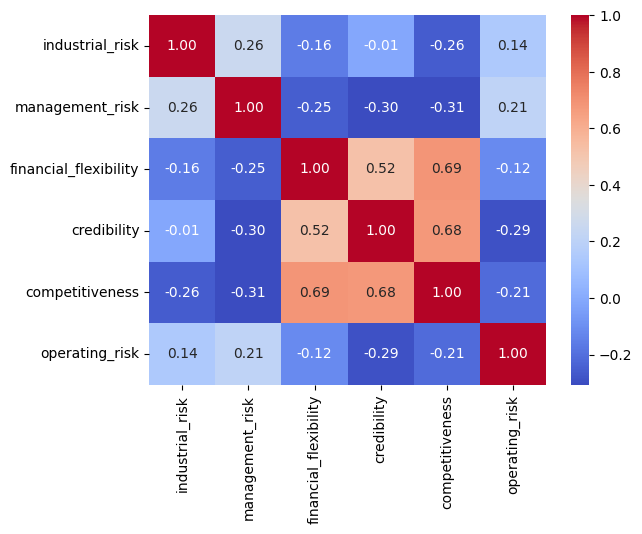

In [ ]:
# Correlation
features = bankrupt.drop('class', axis=1)
correlation_matrix = features.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

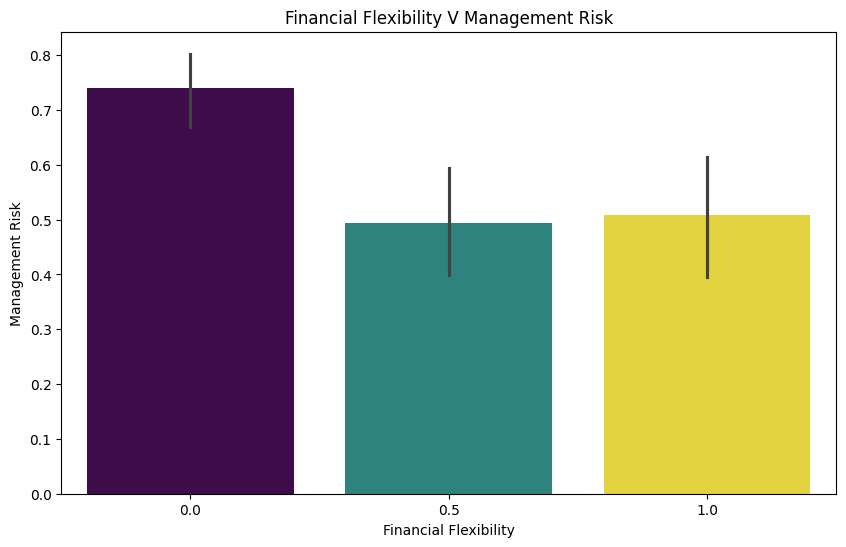

In [ ]:
# Financial Flexibility V Management Risk
plt.figure(figsize=(10, 6))
sns.barplot(x=bankrupt['financial_flexibility'], y=bankrupt['management_risk'], palette="viridis",hue=bankrupt['financial_flexibility'],legend=False)
plt.title('Financial Flexibility V Management Risk')
plt.xlabel('Financial Flexibility')
plt.ylabel('Management Risk')
plt.show()

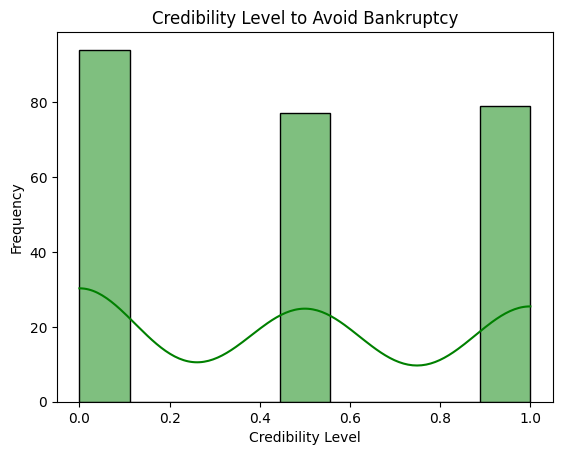

In [ ]:
# Credibility level to avoid Bankruptcy
sns.histplot(bankrupt["credibility"], kde=True,color="green")
plt.title("Credibility Level to Avoid Bankruptcy")
plt.xlabel("Credibility Level")
plt.ylabel("Frequency")
plt.show()

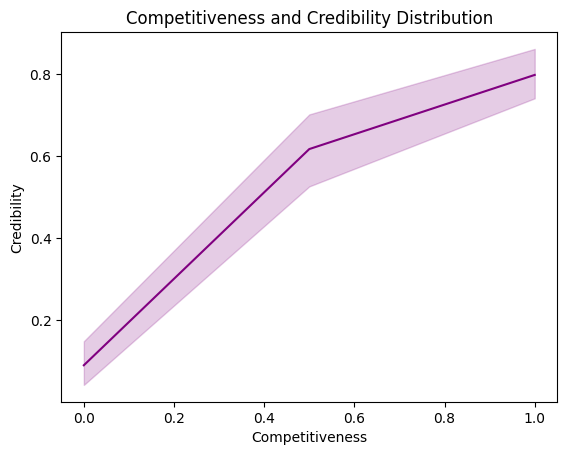

In [ ]:
# Competitiveness and Credibility Distribution
sns.lineplot(data=bankrupt, x="credibility", y="competitiveness",color="purple")
plt.title("Competitiveness and Credibility Distribution")
plt.xlabel("Competitiveness")
plt.ylabel("Credibility")
plt.show()

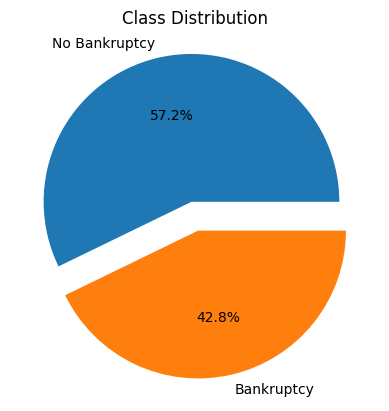

In [ ]:
# Bankruptcy V Non-Bankruptcy
labels = ['No Bankruptcy', 'Bankruptcy']
counts = bankrupt['class'].value_counts()

explode = [0.1, 0.1]  # explode 1st slice

plt.pie(counts, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Class Distribution')
plt.show()

# **Feature Engineering**

In [ ]:
# Label Encoding
from sklearn import preprocessing
bankruptcy = bankrupt.copy()

label_encoder = preprocessing.LabelEncoder()
bankruptcy['class'] = label_encoder.fit_transform(bankrupt['class'])

bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


# **Model Building**

# K Nearest Neighbours (KNN) Classification

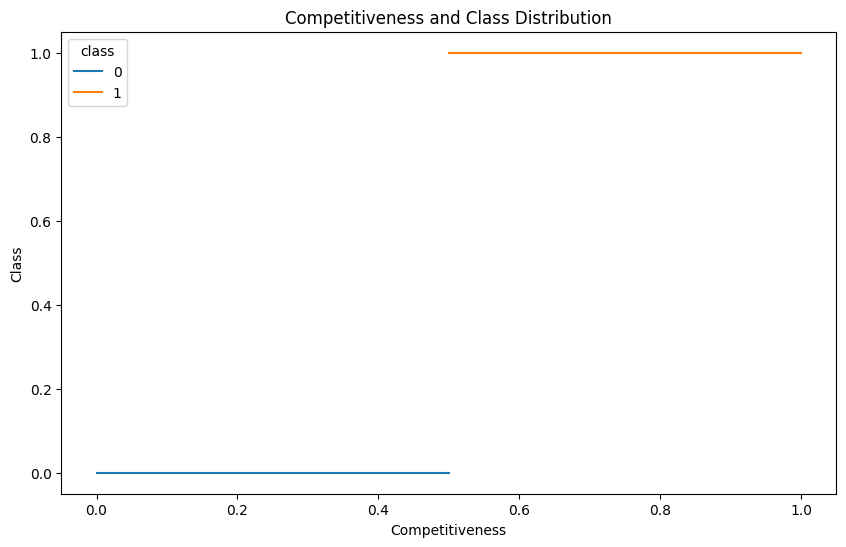

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
# Split the data into training and test sets
X = bankruptcy.drop('class', axis=1)
y = bankruptcy['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Visualize Individual Conditional Expectation
plt.figure(figsize=(10, 6))
sns.lineplot(data=bankruptcy, x="competitiveness", y="class", hue="class")
plt.title("Competitiveness and Class Distribution")
plt.xlabel("Competitiveness")
plt.ylabel("Class")
plt.show()

# Decision Tree Classification

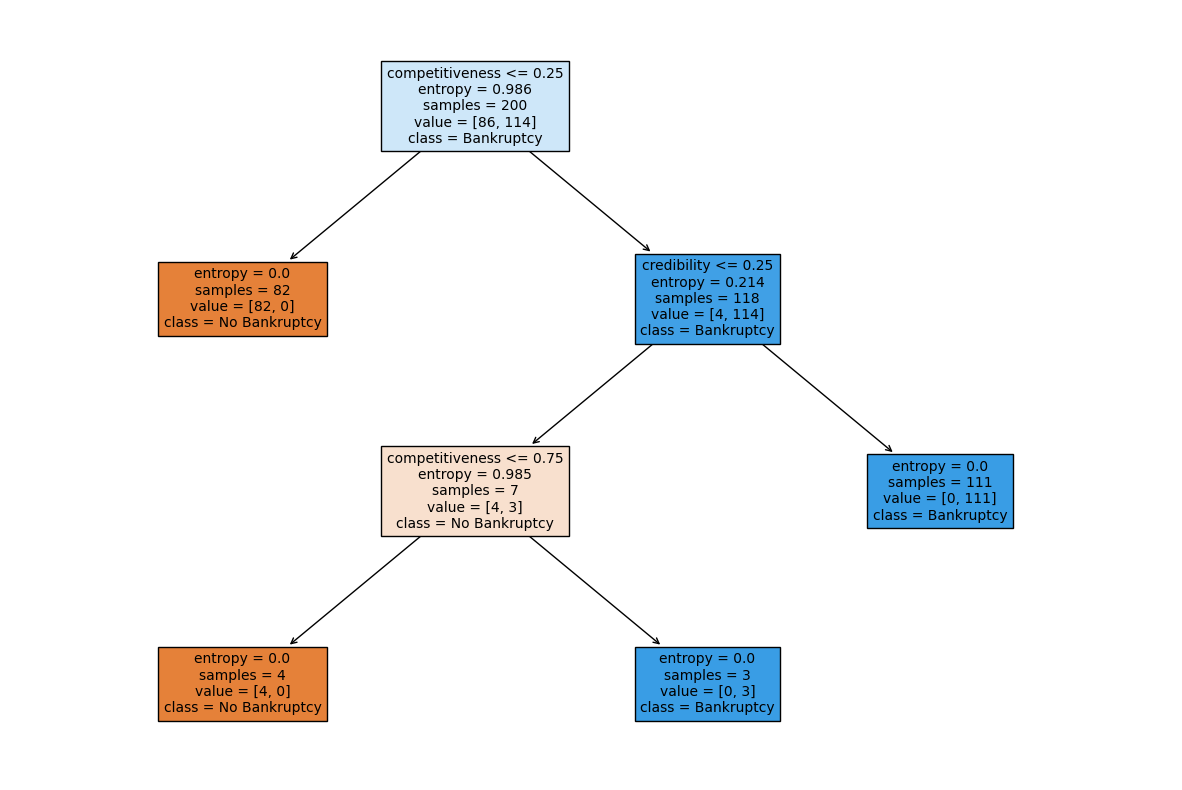

In [ ]:
# Decision Tree Classification
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Visualize Decision Boundary
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Bankruptcy', 'Bankruptcy'], fontsize=10, filled=True)
plt.show()

# Random Forest Classification

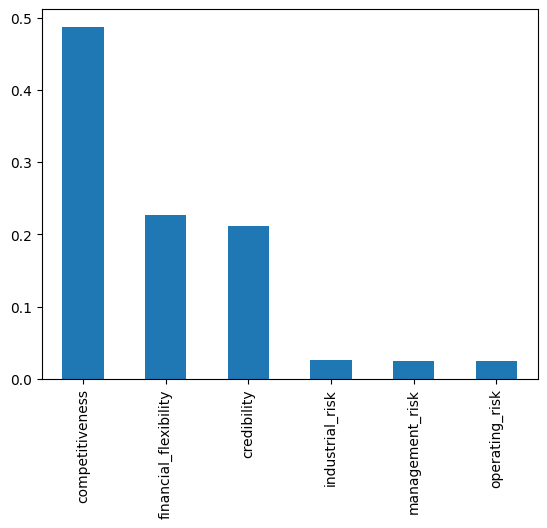

In [ ]:
# Random Forest Classification
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

# **Model Evaluation**

# K Nearest Neighbours (KNN)

In [ ]:
# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
classification_report_knn = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Confusion Matrix:\n", confusion_matrix_knn)
print("Classification Report:\n", classification_report_knn)

Accuracy: 1.0
Precision: 1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Decision Tree Classification

In [ ]:
# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Confusion Matrix:\n", confusion_matrix_dt)
print("Classification Report:\n", classification_report_dt)

Accuracy: 0.98
Precision: 0.980909090909091
Confusion Matrix:
 [[21  0]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Random Forest Classification

In [ ]:
# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Classification Report:\n", classification_report_rf)

Accuracy: 1.0
Precision: 1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
data={"Model":pd.Series(["KNN","Decision Tree","Random Forest"]),"Accuracy":pd.Series([accuracy_knn,accuracy_dt,accuracy_rf]),"Precision":pd.Series([precision_knn,precision_dt,precision_rf])}
value_table=pd.DataFrame(data)
value_table.sort_values("Accuracy")

,Model,Accuracy,Precision
1,Decision Tree,0.98,0.980909
0,KNN,1.00,1.000000
2,Random Forest,1.00,1.000000


**Inference:** *As we can see the Decision Tree classification model has fall short in both accuracy and precision upon comparison, we recommend referring to KNN or Random Forest classification model for decision-making with preference to Random Forest classifier. Going by the models' statistics, we can coclude that the business will not go Bankrupt.*  